In [4]:
%%html
<script>
    // AUTORUN ALL CELLS ON NOTEBOOK-LOAD!
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            $(jupyter.events).on("kernel_ready.Kernel", function () {
                console.log("Auto-running all cells-below...");
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
            });
        }
    );
</script>

In [5]:
from __init__ import *

In [6]:
#resps = get_all(['https://cdn.mos.cms.futurecdn.net/QjuZKXnkLQgsYsL98uhL9X-1200-80.jpg', 'https://s3.amazonaws.com/cdn-origin-etr.akc.org/wp-content/uploads/2017/11/12234558/Chinook-On-White-03.jpg', 'https://d17fnq9dkz9hgj.cloudfront.net/breed-uploads/2018/09/dog-landing-hero-lg.jpg?bust=1536935129&width=1080'])

In [7]:
from pprint import pprint

def run_async(func):
    try:
        loop = asyncio.get_running_loop()
    except RuntimeError:  # if cleanup: 'RuntimeError: There is no current event loop..'
        loop = None

    if loop and loop.is_running():
        print('Async event loop already running')
        tsk = loop.create_task(func)
        # ^-- https://docs.python.org/3/library/asyncio-task.html#task-object
        tsk.add_done_callback(                                          # optional
            lambda t: print(f'Task done: '                              # optional
                            f'{t.result()=} << return val of main()\n\nlocals: {pprint(dict(globals()))}'))  # optional (using py38)
    else:
        print('Starting new event loop')
        asyncio.run(main())

In [8]:
async def test():
    return 'done!'

run_async(test())

Async event loop already running


In [9]:
(lambda: f'{print("hello")}{print("there")}')()

hello
there


'NoneNone'

In [12]:
#f'{x = 1+1}'

In [13]:
resps = await get_all_pages(['https://cdn.mos.cms.futurecdn.net/QjuZKXnkLQgsYsL98uhL9X-1200-80.jpg', 'https://s3.amazonaws.com/cdn-origin-etr.akc.org/wp-content/uploads/2017/11/12234558/Chinook-On-White-03.jpg', 'https://d17fnq9dkz9hgj.cloudfront.net/breed-uploads/2018/09/dog-landing-hero-lg.jpg?bust=1536935129&width=1080'])

In [14]:
resps

[<ClientResponse(https://cdn.mos.cms.futurecdn.net/QjuZKXnkLQgsYsL98uhL9X-1200-80.jpg) [200 OK]>
 <CIMultiDictProxy('Date': 'Mon, 04 May 2020 22:28:16 GMT', 'Content-Type': 'image/jpeg', 'Content-Length': '60785', 'Connection': 'keep-alive', 'Cache-Control': 'max-age=5184000', 'Expires': 'Fri, 03 Jul 2020 22:30:13 GMT', 'Server': 'openresty/1.15.8.1', 'X-Backend': 'default', 'X-FTR-Backend': 'mos_kodiak', 'X-FTR-Backend-Server': 'kube', 'X-FTR-Balancer': 'bulkproxyprod01', 'X-FTR-Cache-Status': 'MISS', 'X-FTR-DC': 'TC', 'X-FTR-Realm': 'pip', 'X-FTR-Request-ID': '00000000:C1E4_00000000:0050_5EB096FF_CE701:1A3B', 'X-Served-By': 'kodiak-mos-adapter-varnish-fdc57966-fkvrc', 'Age': '25468', 'Accept-Ranges': 'bytes')>,
 <ClientResponse(https://s3.amazonaws.com/cdn-origin-etr.akc.org/wp-content/uploads/2017/11/12234558/Chinook-On-White-03.jpg) [200 OK]>
 <CIMultiDictProxy('x-amz-id-2': 'yZ1WeQVg66JmHQIbakrZUIoE9B2TyovjT36xN04AsopqmfG+YNwgcth9EBJKs49x3gAvU+KSUkA=', 'x-amz-request-id': 'E5E94CB

In [15]:
resps[0].json()

<coroutine object ClientResponse.json at 0x7f45de50e9c0>

In [25]:
img2 = await resps[2].read()

In [28]:
from IPython.display import Image

for r in resps:
    try:
        img = await r.read()
        Image(img)
    except Exception as err:
        print(err)

Connection closed


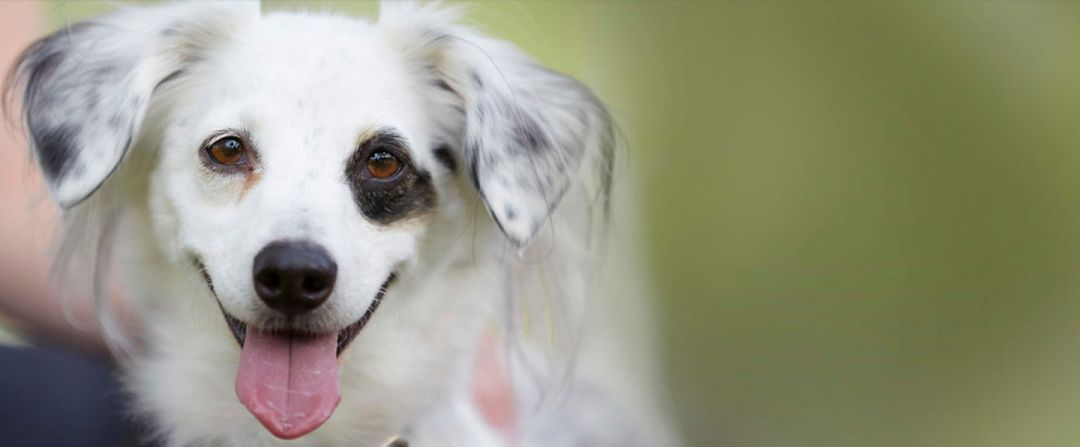

In [26]:
Image(img2)

In [27]:
resps[0]

<ClientResponse(https://cdn.mos.cms.futurecdn.net/QjuZKXnkLQgsYsL98uhL9X-1200-80.jpg) [200 OK]>
<CIMultiDictProxy('Date': 'Mon, 04 May 2020 22:28:16 GMT', 'Content-Type': 'image/jpeg', 'Content-Length': '60785', 'Connection': 'keep-alive', 'Cache-Control': 'max-age=5184000', 'Expires': 'Fri, 03 Jul 2020 22:30:13 GMT', 'Server': 'openresty/1.15.8.1', 'X-Backend': 'default', 'X-FTR-Backend': 'mos_kodiak', 'X-FTR-Backend-Server': 'kube', 'X-FTR-Balancer': 'bulkproxyprod01', 'X-FTR-Cache-Status': 'MISS', 'X-FTR-DC': 'TC', 'X-FTR-Realm': 'pip', 'X-FTR-Request-ID': '00000000:C1E4_00000000:0050_5EB096FF_CE701:1A3B', 'X-Served-By': 'kodiak-mos-adapter-varnish-fdc57966-fkvrc', 'Age': '25468', 'Accept-Ranges': 'bytes')>

In [29]:
r

<ClientResponse(https://d17fnq9dkz9hgj.cloudfront.net/breed-uploads/2018/09/dog-landing-hero-lg.jpg?bust=1536935129&width=1080) [200 OK]>
<CIMultiDictProxy('Content-Type': 'image/jpeg', 'Content-Length': '32817', 'Connection': 'keep-alive', 'Accept-Ranges': 'bytes', 'Last-Modified': 'Tue, 16 Oct 2018 18:50:44 GMT', 'Server': 'nginx', 'X-Frame-Options': 'SAMEORIGIN', 'Cache-Control': 'max-age=2592000', 'Date': 'Sat, 02 May 2020 04:49:01 GMT', 'ETag': '"00836efabded939d79d00ea755e4b140"', 'Expires': 'Mon, 01 Jun 2020 04:49:01 GMT', 'X-Cache': 'Hit from cloudfront', 'Via': '1.1 132c336717614b4e1e53e285506f67e1.cloudfront.net (CloudFront)', 'X-Amz-Cf-Pop': 'DFW55-C1', 'X-Amz-Cf-Id': 'Wh3FoZzOPfc5r-AjTq0uppENA6WEUCS8VERX5dZ_8WcOZtR2s-dB3g==', 'Age': '261823')>

In [30]:
urls = ['https://cdn.mos.cms.futurecdn.net/QjuZKXnkLQgsYsL98uhL9X-1200-80.jpg', 'https://s3.amazonaws.com/cdn-origin-etr.akc.org/wp-content/uploads/2017/11/12234558/Chinook-On-White-03.jpg', 'https://d17fnq9dkz9hgj.cloudfront.net/breed-uploads/2018/09/dog-landing-hero-lg.jpg?bust=1536935129&width=1080']

In [32]:
Image(url=urls[0])

In [36]:
str(resps[0].url)

'https://cdn.mos.cms.futurecdn.net/QjuZKXnkLQgsYsL98uhL9X-1200-80.jpg'